
# Simple Linear Regression Example 

This simple linear regression example uses the `diabetes` dataset from sklearn.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [2]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

In [3]:
type(diabetes) # not a pandas dataframe

sklearn.utils.Bunch

In [4]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names'])

In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Create a Pandas dataframe with feature names as the column names. 

In [6]:
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
df.shape

(442, 10)

In [8]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [9]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

Need to set X, X_b which is X plus a column of all 1s, and y

In [10]:
diabetes.data.shape

(442, 10)

In [11]:
X = diabetes.data
X_b = np.c_[np.ones((442, 1)), X] # add x0 = 1 to each instance
X_b.data.shape

(442, 11)

In [12]:
y = diabetes.target
y.shape

(442,)

In [13]:
y = y.reshape(442,1)

In [14]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [15]:
theta_best

array([[ 152.13348416],
       [ -10.01219782],
       [-239.81908937],
       [ 519.83978679],
       [ 324.39042769],
       [-792.18416163],
       [ 476.74583782],
       [ 101.04457032],
       [ 177.06417623],
       [ 751.27932109],
       [  67.62538639]])

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([152.13348416]),
 array([[ -10.01219782, -239.81908937,  519.83978679,  324.39042769,
         -792.18416163,  476.74583782,  101.04457032,  177.06417623,
          751.27932109,   67.62538639]]))

In [17]:
eta = 0.5
n_iterations = 1000000
m = 442
theta = np.random.randn(11,1)

In [18]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[ 152.13348416],
       [ -10.0121978 ],
       [-239.81908935],
       [ 519.83978682],
       [ 324.39042768],
       [-792.18415867],
       [ 476.74583547],
       [ 101.044569  ],
       [ 177.06417585],
       [ 751.27931998],
       [  67.6253864 ]])

In [20]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [21]:
from sklearn.linear_model import SGDRegressor
#sgd_reg = SGDRegressor()
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.25, random_state=42, learning_rate='optimal')

In [22]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.25,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [
# try 36 (3×3×4) combinations of hyperparameters
    {'eta0': [0.2, 0.25, 0.5],
    'learning_rate': ['constant','optimal','invscaling'],
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    },
]

grid_search = GridSearchCV(sgd_reg, param_grid, cv=5,
scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X, y.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.25,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty=None,
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'eta0': [0.2, 0.25, 0.5], 'learning_rate': ['constant', 'optimal', 'invscaling'], 'penalty': ['l2', 'l1', 'elasticnet', 'none']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [24]:
grid_search.best_params_

{'eta0': 0.2, 'learning_rate': 'invscaling', 'penalty': 'l1'}

In [25]:
grid_search.best_estimator_

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.2,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=1000, n_iter=None, penalty='l1',
       power_t=0.25, random_state=42, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

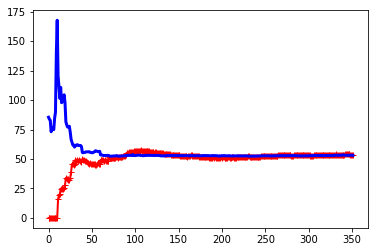

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [ ]:
from sklearn.linear_model import SGDRegressor
#sgd_reg = SGDRegressor()
sgd_reg = SGDRegressor(max_iter=1000, penalty=None, eta0=0.25, random_state=42, learning_rate='optimal')
plot_learning_curves(sgd_reg,X,y.ravel())
